In [ ]:
%pip install pandas numpy scikit-learn matplotlib

   Training Size (%)      MAE       R²
0                100  0.81479  0.96890
1                 80  0.90429  0.96245
2                 60  1.03808  0.94940
3                 40  1.30334  0.93792
4                 20  1.88965  0.87132
5                 10  2.43095  0.82999


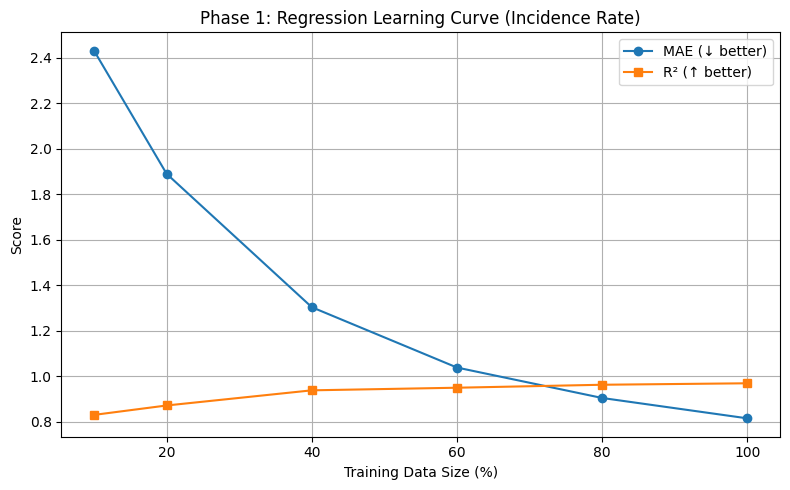

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("normalized_data.csv")

# Preprocessing
df["rate"] *= 100000
df["pollution_smoking"] = df["air_pollution"] * df["tobacco_use"]
df["cancer_code"] = df["cancer_name"].astype("category").cat.codes

feature_cols = [
    "air_pollution", "tobacco_use", "alcohol_use", "obesity_rate",
    "gdp_per_capita", "uhc_index", "population", "pollution_smoking", "cancer_code"
]

# Filter for incidence data
inc_df = df[df["measure"] == "Incidence"].dropna(subset=feature_cols + ["rate"])
X = inc_df[feature_cols]
y = inc_df["rate"]

# Split once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on different data sizes
fractions = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1]
mae_scores = []
r2_scores = []

for frac in fractions:
    if frac == 1.0:
        X_frac = X_train
        y_frac = y_train
    else:
        X_frac, _, y_frac, _ = train_test_split(X_train, y_train, train_size=frac, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_frac, y_frac)
    y_pred = model.predict(X_test)

    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Show results
results_df = pd.DataFrame({
    "Training Size (%)": [int(f * 100) for f in fractions],
    "MAE": np.round(mae_scores, 5),
    "R²": np.round(r2_scores, 5)
})
print(results_df)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(results_df["Training Size (%)"], mae_scores, marker='o', label='MAE (↓ better)')
plt.plot(results_df["Training Size (%)"], r2_scores, marker='s', label='R² (↑ better)')
plt.title("Phase 1: Regression Learning Curve (Incidence Rate)")
plt.xlabel("Training Data Size (%)")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In Phase 1, we revisited our original regression-based approach to assess data efficiency. Using a Random Forest Regressor on the full normalized_data.csv, we predicted cancer incidence rates across different fractions of the training data. We found that even with just 40% of the data, the model retained a high R² score of 0.94, indicating strong explanatory power. This demonstrates that our model can generalize well with significantly less data, which is especially valuable when working with limited country-level health information. The findings reinforce the robustness and efficiency of our regression pipeline.